In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import pickle
import os


In [2]:
# Load your dataset
df = pd.read_csv("zone_4_v1.csv")
df

,soil_moisture,NDBI,BU,Roughness,Slope,NDVI,LST,UHI,UTFVI,NDWI,...,SO2_column_number_density_x,CH4_column_volume_mixing_ratio_dry_air_y,CO_column_number_density_y,tropospheric_HCHO_column_number_density_y,NO2_column_number_density_y,O3_column_number_density_y,SO2_column_number_density_y,Longitude,Latitude,geometry
0,125.331552,-0.129746,-0.271251,0.000000,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.567614,...,0.000028,1907.877197,0.033998,0.000110,0.000133,0.142454,0.000028,9.240700,45.419989,POINT (9.240699833152282 45.41998857495235)
1,130.649125,-0.091416,-0.238252,0.000000,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.602588,...,0.000028,1907.877197,0.033998,0.000110,0.000133,0.142454,0.000028,9.240341,45.420168,POINT (9.240340507038631 45.420168238009175)
2,130.643567,-0.112200,-0.245295,0.000000,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.579211,...,0.000028,1907.877197,0.033998,0.000110,0.000133,0.142454,0.000028,9.240520,45.420168,POINT (9.240520170095458 45.42016823800918)
3,195.133153,-0.129746,-0.271251,0.000000,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.560563,...,0.000028,1907.877197,0.033998,0.000110,0.000133,0.142454,0.000028,9.240700,45.420168,POINT (9.240699833152282 45.42016823800918)
4,132.716402,-0.129746,-0.271251,0.000000,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.621918,...,0.000028,1907.877197,0.033998,0.000110,0.000133,0.142454,0.000028,9.240879,45.420168,POINT (9.240879496209104 45.42016823800917)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868904,80.261894,-0.141386,-0.317775,1.194028,89.992510,0.672222,31.123902,-1.343893,-0.091756,-0.580599,...,0.000077,1908.117493,0.034105,0.000142,0.000139,0.142354,0.000077,9.271602,45.472091,POINT (9.271601878925994 45.47209086143129)
868905,81.665649,-0.114660,-0.288787,1.158672,89.992510,0.672222,31.123902,-1.343893,-0.091756,-0.583252,...,0.000077,1908.117493,0.034105,0.000142,0.000139,0.142354,0.000077,9.271782,45.472091,POINT (9.271781541982817 45.47209086143129)
868906,80.868521,-0.123311,-0.276461,1.158672,89.993095,0.664868,32.456847,-0.716629,-0.046919,-0.611053,...,0.000077,1908.117493,0.034105,0.000142,0.000139,0.142354,0.000077,9.271961,45.472091,POINT (9.271961205039641 45.47209086143129)
868907,89.491213,-0.123311,-0.276461,1.069273,89.969118,0.664868,32.456847,-0.716629,-0.046919,-0.565267,...,0.000077,1908.117493,0.034105,0.000142,0.000139,0.142354,0.000077,9.272141,45.472091,POINT (9.272140868096464 45.47209086143128)


In [3]:


df.drop(columns= ['Unnamed: 0.1', 'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y'], inplace=True)

# Identify numerical and categorical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns


In [4]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('normalizer', Normalizer())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [5]:
# Combine preprocessing and clustering into a full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, init='k-means++', random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(df)

# Save the pipeline to a pickle file
with open('kmeans_pipeline_new.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Pipeline saved to 'kmeans_pipeline_new.pkl'")


Pipeline saved to 'kmeans_pipeline.pkl'


In [6]:
numerical_features

Index(['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'GHI (kWh/m2)',
       'Longitude', 'Latitude'],
      dtype='object')

In [7]:
categorical_features

Index(['Amenity', 'geometry'], dtype='object')

Loading New Dataset

In [12]:
import pandas as pd
import pickle

# Training data Columns
expected_columns = ['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'GHI (kWh/m2)','Amenity',
       'Longitude', 'Latitude', 'geometry']

# Load the new data
new_data = pd.read_csv('zone_4_zone_9_combined.csv')

# Add missing columns to new data
for col in expected_columns:
    if col not in new_data.columns:
        new_data[col] = 0  # or use any appropriate default value

# Drop extra columns from new data
new_data = new_data[expected_columns]

# Load the pipeline from the pickle file
with open('kmeans_pipeline_new.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Use the loaded pipeline to predict clusters for new data
predicted_labels = loaded_pipeline.predict(new_data)
print(predicted_labels)


[1 1 1 ... 1 1 1]


In [13]:
new_data.head()

,soil_moisture,NDBI,BU,Roughness,Slope,NDVI,LST,UHI,UTFVI,NDWI,SAVI,lulc_classes,GHI (kWh/m2),Amenity,Longitude,Latitude,geometry
0,125.331552,-0.129746,-0.271251,0.0,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.567614,0.206486,4,1422.1,car_wash,9.240700,45.419989,POINT (9.240699833152282 45.41998857495235)
1,130.649125,-0.091416,-0.238252,0.0,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.602588,0.327870,4,1422.1,car_wash,9.240341,45.420168,POINT (9.240340507038631 45.420168238009175)
2,130.643567,-0.112200,-0.245295,0.0,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.579211,0.327870,4,1422.1,car_wash,9.240520,45.420168,POINT (9.240520170095458 45.42016823800918)
3,195.133153,-0.129746,-0.271251,0.0,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.560563,0.206486,4,1422.1,car_wash,9.240700,45.420168,POINT (9.240699833152282 45.42016823800918)
4,132.716402,-0.129746,-0.271251,0.0,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.621918,0.206486,4,1422.1,car_wash,9.240879,45.420168,POINT (9.240879496209104 45.42016823800917)


In [18]:
# Count the number of data points in each cluster
cluster_counts = pd.Series(predicted_labels).value_counts().sort_index()
cluster_counts


0     261412
1     441655
2    1036152
Name: count, dtype: int64

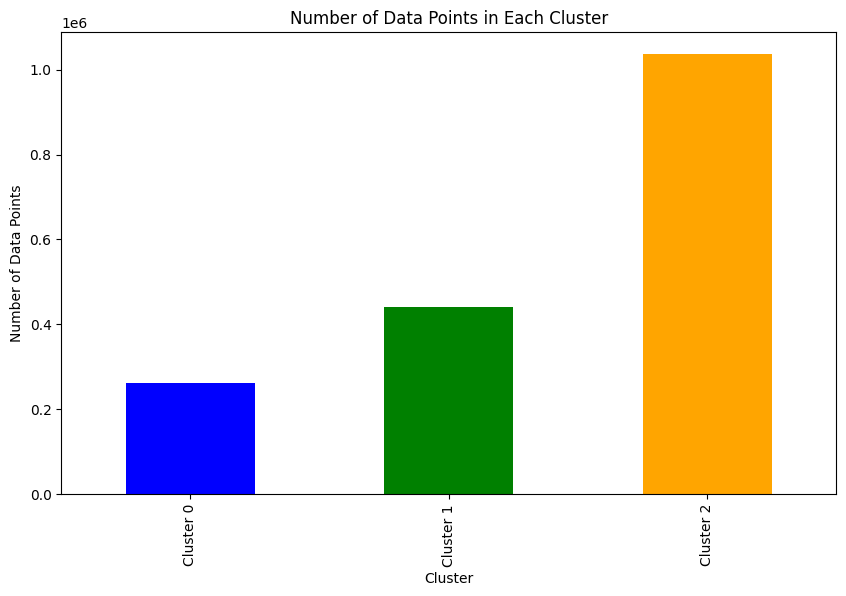

In [19]:
import matplotlib.pyplot as plt

# Plot the bar chart for the clusters
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()


Cluster 0 indicates builtup are not suitable for Urban farming
Cluster 1 indicates area suitable for Urban farming
Cluster 2 indicates built up area with growing trees